In [71]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Encoding for corrmatrix
https://www.kaggle.com/code/getanmolgupta01/employe-attrition-eda-ensemble-ann#-Encoding-


In [72]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [73]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [76]:
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [77]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [78]:
df = pd.concat([df,encoded_df],axis=1)

In [79]:
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime', 'Over18', 'EmployeeCount', 'StandardHours'],axis =1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   Gender                             1470 non-null   int64  
 8   HourlyRate                         1470 non-null   int64  
 9   JobInvolvement                     1470 non-null   int64  
 10  JobLevel                           1470 non-null   int64  
 11  JobSatisfaction                    1470 non-null   int64

<Axes: title={'center': 'Correlation Plot'}>

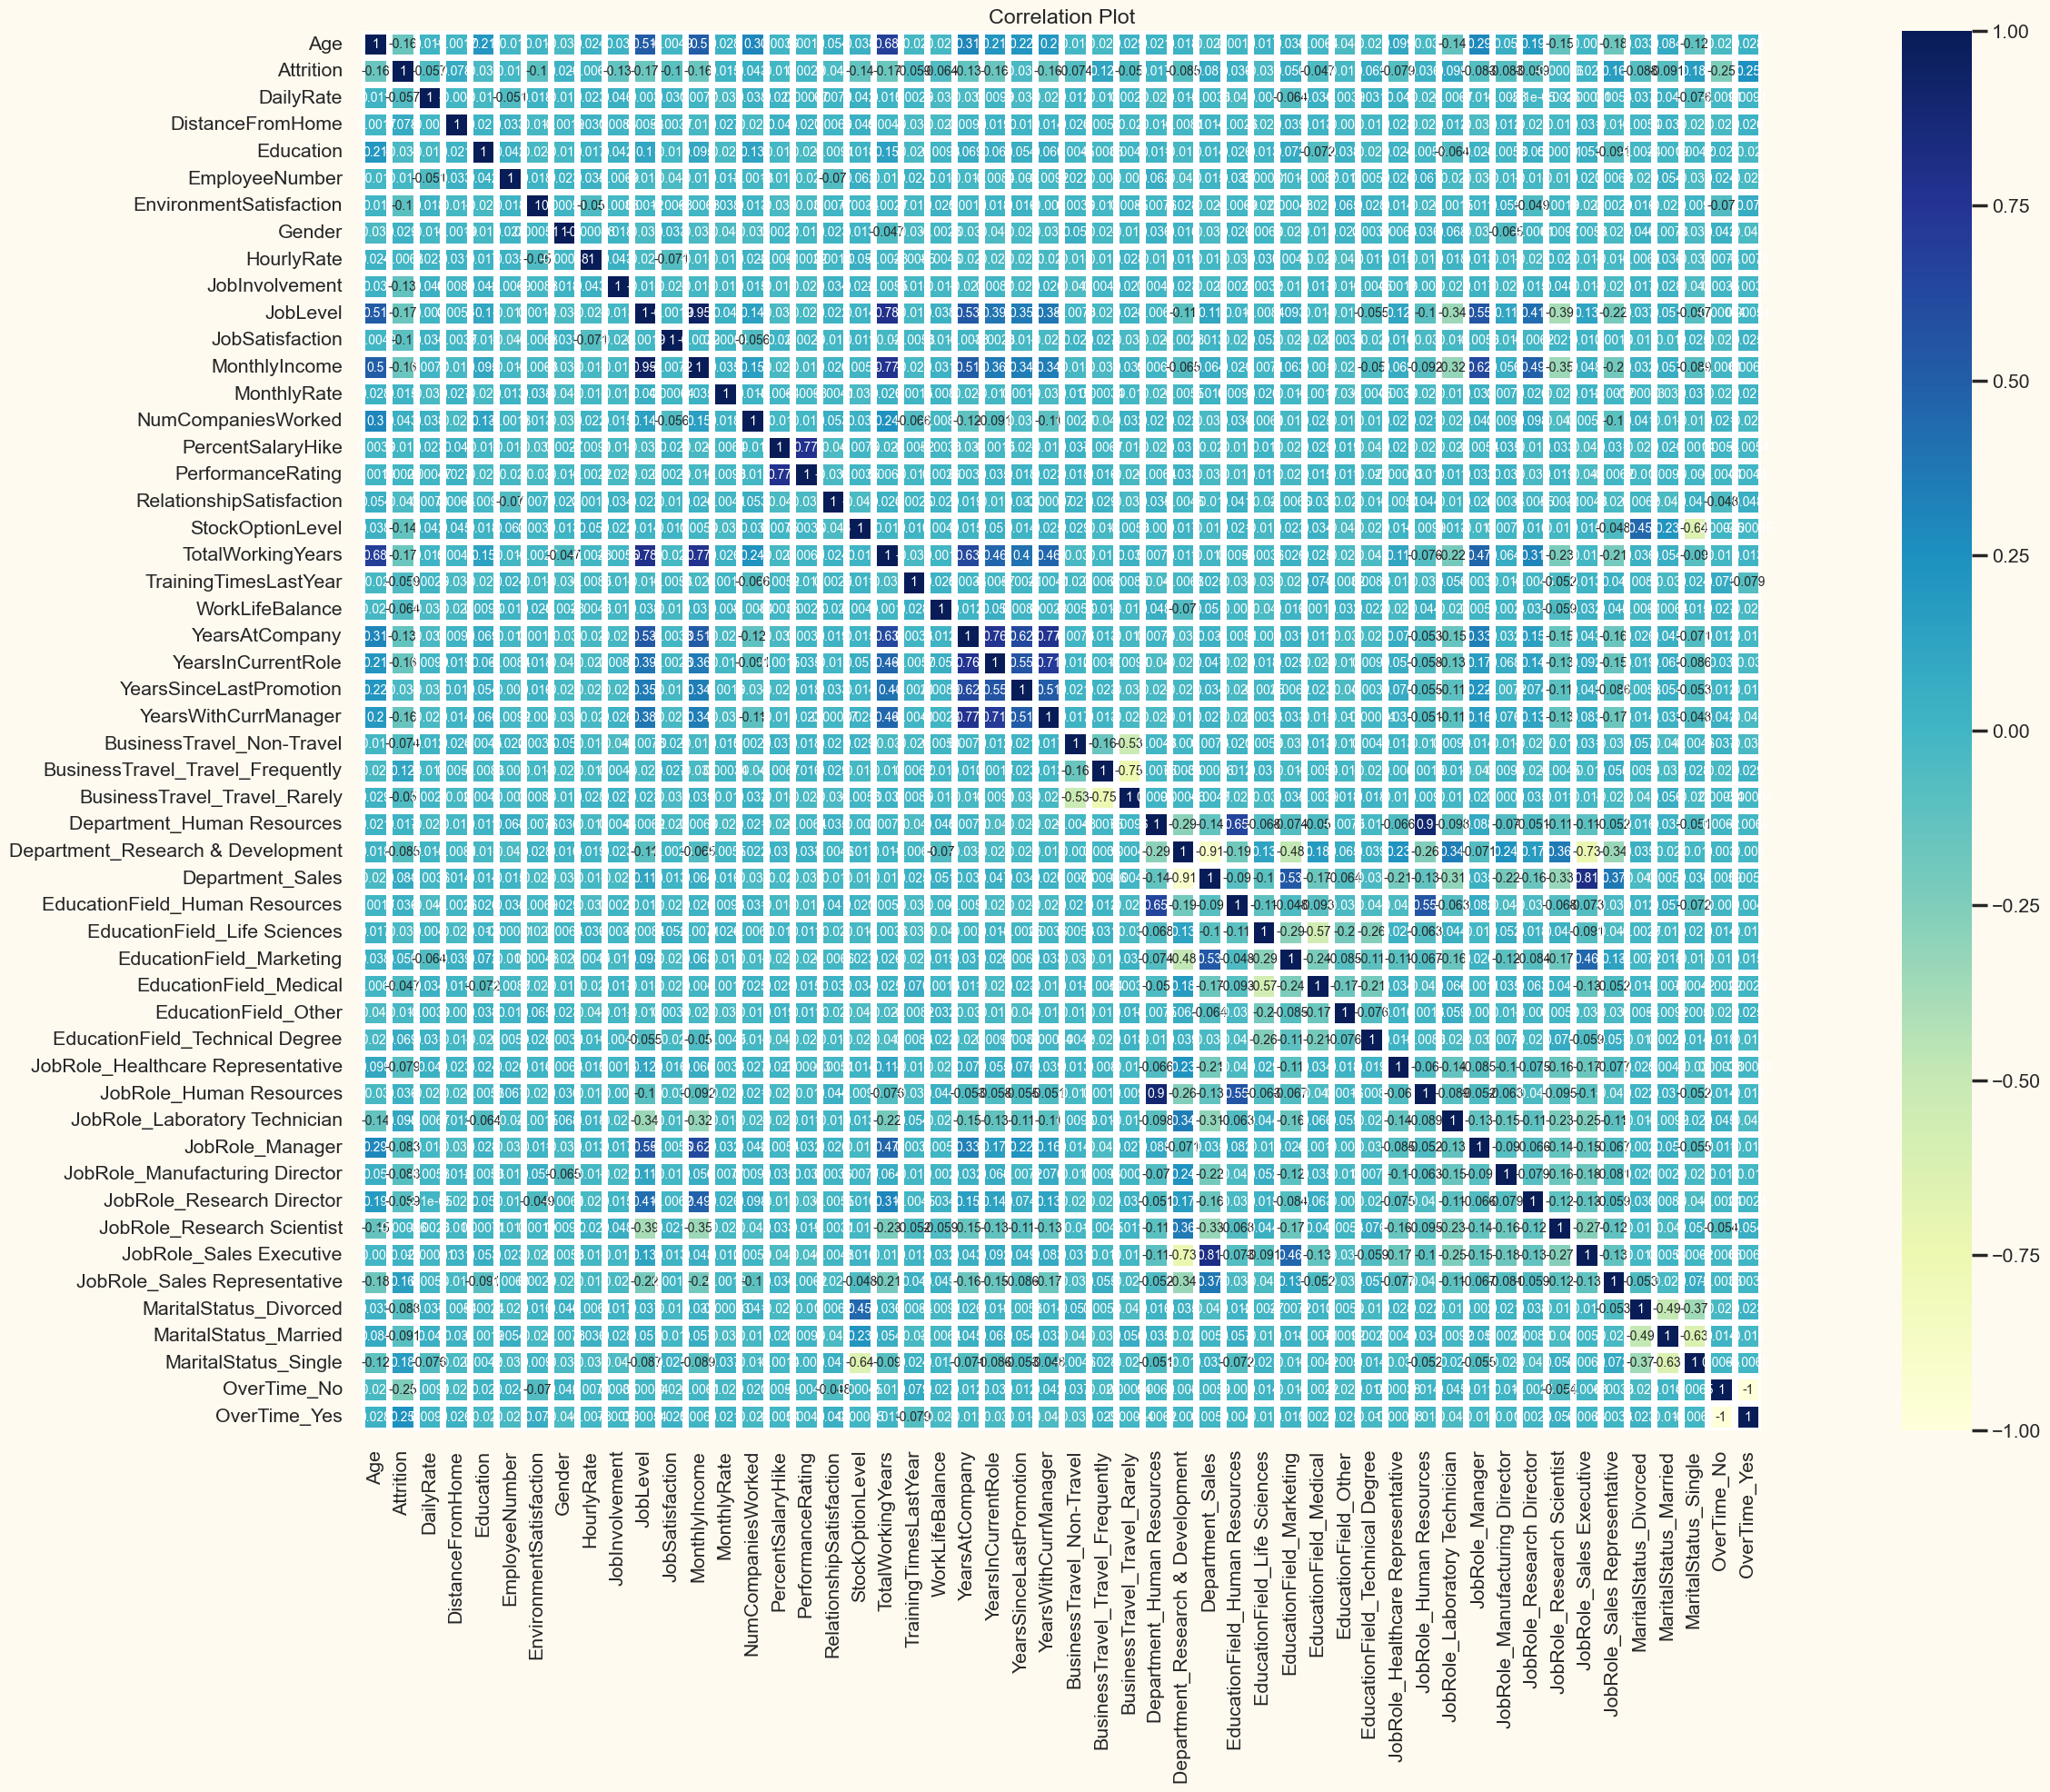

In [81]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')